In [1]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
import time


<h1 id="exercise-1"><strong>Exercise 1</strong></h1>


<font size="4px"><p>This method returns the fruit name by getting the string at a specific index of the set.</p>
<dl>
<dt>param fruit_id</dt>
<dd><p>The id of the fruit to get</p>
</dd>
<dt>param fruits</dt>
<dd><p>The set of fruits to choose the id from</p>
</dd>
<dt>return</dt>
<dd><p>The string corrosponding to the index <code>fruit_id</code></p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   It does not print the fruit at the correct index, why is the returned result wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue: name1, name3 and name4 are expected to correspond to the strings at the indices 1, 3, and 4: 'orange', 'kiwi' and 'strawberry'..</p>
</font>

<h2 id="answer-1"><strong>Answer to exercise 1</strong></h2>

In this assignment, let's use the ipdb module as the debugging tool.

First, we need to install and import it using the following command:

In [3]:
!pip install ipdb
import ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.0 MB/s eta 0:00:00


Now, we can use ```ipdb.set_trace()``` to add a breakpoint in the original code.

In [ ]:
"""ADDING BREAKPOINTS"""
def id_to_fruit(fruit_id: int, fruits: Set[str]) -> str:
    idx = 0
    for fruit in fruits:
        ipdb.set_trace() #<----
        if fruit_id == idx:
            return fruit
        idx += 1
    raise RuntimeError(f"Fruit with id {fruit_id} does not exist")

name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 336, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-18-17bfa7255c91>(6)id_to_fruit()
      5         ipdb.set_trace()
----> 6         if fruit_id == idx:
      7             return fruit

ipdb> fruit
'orange'
ipdb> idx
0
ipdb> fruits
{'orange', 'apple', 'melon', 'kiwi', 'strawberry'}
ipdb> c



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 347, in set_continue
    sys.settrace(None)



> <ipython-input-18-17bfa7255c91>(6)id_to_fruit()
      5         ipdb.set_trace()
----> 6         if fruit_id == idx:
      7             return fruit

ipdb> fruit
'apple'
ipdb> idx
1
ipdb> fruits
{'orange', 'apple', 'melon', 'kiwi', 'strawberry'}
ipdb> q



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 361, in set_quit
    sys.settrace(None)



The trace shows that in function ```id_to_fruit```, the set ```fruits``` contains ```{'orange', 'apple', 'melon', 'kiwi', 'strawberry'}``` in order.

As ```orange``` becomes the first item in the set, we got a wrong result with ```name1```.

The main issue here is that, in python, ```set``` is an **unordered** structure, we cannot assume the order to be preserved when listing items.

One way to avoid this issue is using a ```list``` instead of a ```set```. The code segment below shows the desired result.

In [ ]:
"""CORRECTION"""
def id_to_fruit(fruit_id: int, fruits: List[str]) -> str: # change the struture to list
    idx = 0
    for fruit in fruits:
        if fruit_id == idx:
            return fruit
        idx += 1
    raise RuntimeError(f"Fruit with id {fruit_id} does not exist")

name1 = id_to_fruit(1, ["apple", "orange", "melon", "kiwi", "strawberry"]) # use square brackets instead of curly brackets
name3 = id_to_fruit(3, ["apple", "orange", "melon", "kiwi", "strawberry"])
name4 = id_to_fruit(4, ["apple", "orange", "melon", "kiwi", "strawberry"])
print(name1, name3, name4)

orange kiwi strawberry


<h1 id="exercise-2"><strong>Exercise 2</strong></h1>


<font size="4px"><p>This method will flip the x and y coordinates in the coords array.</p>
<dl>
<dt>param coords</dt>
<dd><p>A numpy array of bounding box coordinates with shape [n,5] in format: :</p>
<pre><code>[[x11, y11, x12, y12, classid1],
 [x21, y21, x22, y22, classid2],
 ...
 [xn1, yn1, xn2, yn2, classid3]]</code></pre>
</dd>
<dt>return</dt>
<dd><p>The new numpy array where the x and y coordinates are flipped.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   Can you spot the obvious error?</code><br />
<code>2   After fixing the obvious error it is still wrong, how can this be fixed?</code></div>
</font>

<font size="4px"><p>The example demonstrates the issue. The returned swapped_coords are expected to have swapped x and y coordinates in each of the rows.</p>
</font>

<h2 id="answer-2"><strong>Answer to exercise 2</strong></h2>

Upon inspecting the code segment, one obvious error can be found is the wrong index when swapping columns.

Let's fix it first and deploy breakpoints.

In [ ]:
"""FIX1 & ADDING BREAKPOINTS"""
def swap(coords: np.ndarray):
    #coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2] <----the second index on the right hand side is wrong
    coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 0], coords[:, 3], coords[:, 2]
    ipdb.set_trace() #<----
    return coords

import numpy as np
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)


> <ipython-input-22-392e5ac39d42>(6)swap()
      5     ipdb.set_trace()
----> 6     return coords
      7 

ipdb> coords
array([[ 5,  5,  6,  6,  0],
       [ 3,  3,  6,  6,  0],
       [ 3,  3,  6,  6,  1],
       [ 4,  4,  6,  6,  1],
       [ 5,  5, 16, 16,  1]])
ipdb> q


Looks like the swapping didn't go as we expected. Specifically, the x coordinates are overridden by the y coordinates and gone.

Searching on this topic reveals that

> *NumPy slicing creates a **view** instead of a copy as in the case of built-in Python sequences such as string, tuple and list.*

[[Numpy documentation](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding), [Stackoverflow topic](https://stackoverflow.com/questions/4857927/swapping-columns-in-a-numpy-array)]

If we want to avoid this issue, one way is to use ```advanced slicing```, since it creates a **copy** of the original numpy array.

The code segment below shows the desired result.


In [ ]:
"""CORRECTION"""
def swap(coords: np.ndarray):
    coords[:, [0,1,2,3]]= coords[:, [1,0,3,2]] #<----
    return coords

import numpy as np
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)
swapped_coords

array([[ 5, 10,  6, 15,  0],
       [ 3, 11,  6, 13,  0],
       [ 3,  5,  6, 13,  1],
       [ 4,  4,  6, 13,  1],
       [ 5,  6, 16, 13,  1]])

<h1 id="exercise-3"><strong>Exercise 3</strong></h1>


<font size="4px"><p>This code plots the precision-recall curve based on data from a .csv file, where precision is on the x-axis and recall is on the y-axis. It it not so important right now what precision and recall means.</p>
<dl>
<dt>param csv_file_path</dt>
<dd><p>The CSV file containing the data to plot.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   For some reason the plot is not showing correctly, can you find out what is going wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue. It first generates some data in a csv file format and the plots it using the <code>plot_data</code> method. If you manually check the coordinates and then check the plot, they do not correspond.</p>
</font>

<h2 id="answer-3"><strong>Answer to exercise 3</strong></h2>

Since we want to plot the results array, let's inspect the contents of it first.

In [ ]:
"""ADDING BREAKPOINTS"""
def plot_data(csv_file_path: str):
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append(row)
        results = np.stack(results)
    ipdb.set_trace() #<----

    # plot precision-recall curve
    plt.plot(results[:, 1], results[:, 0])
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')

> <ipython-input-24-2f9fba242b6b>(14)plot_data()
     13     # plot precision-recall curve
---> 14     plt.plot(results[:, 1], results[:, 0])
     15     plt.ylim([-0.05, 1.05])

ipdb> results
array([['0.013', '0.951'],
       ['0.376', '0.851'],
       ['0.441', '0.839'],
       ['0.57', '0.758'],
       ['0.635', '0.674'],
       ['0.721', '0.604'],
       ['0.837', '0.531'],
       ['0.86', '0.453'],
       ['0.962', '0.348'],
       ['0.982', '0.273'],
       ['1.0', '0.0']], dtype='<U5')
ipdb> q


It is shown that the contents in ```results``` are actually strings, not floting point data types after file output/input operations.

Casting the data into floating point type yields the desired plot.

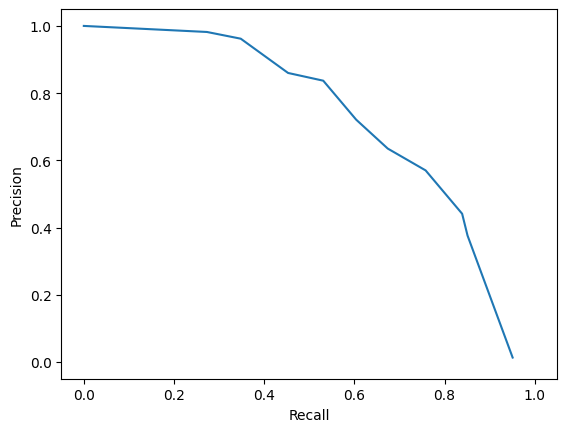

In [ ]:
"""CORRECTION"""
def plot_data(csv_file_path: str):
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append(row)
        results = np.stack(results)
    results = results.astype(float) #<----

    # plot precision-recall curve
    plt.plot(results[:, 1], results[:, 0])
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')

<h1 id="generator-for-exercise-4">** Generator (for Exercise 4)**</h1>


<font size="4px"><p>Generator class for the GAN</p>
</font>

In [2]:
# You can copy this code to your personal pipeline project or execute it here.
class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output



<h1 id="discriminator-for-exercise-4">** Discriminator (for Exercise 4)**</h1>


<font size="4px"><p>Discriminator class for the GAN</p>
</font>

In [4]:
# You can copy this code to your personal pipeline project or execute it here.
class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output



<h1 id="exercise-4">** Exercise 4**</h1>


<font size="4px"><p>The method trains a Generative Adversarial Network and is based on: <a href="https://realpython.com/generative-adversarial-networks/">https://realpython.com/generative-adversarial-networks/</a></p>
<p>The Generator network tries to generate convincing images of handwritten digits. The Discriminator needs to detect if the image was created by the Generater or if the image is a real image from a known dataset (MNIST). If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult to distinguish from real images. This is goal of a GAN.</p>
<p>This code produces the expected results at first attempt at about 50 epochs.</p>
<dl>
<dt>param batch_size</dt>
<dd><p>The number of images to train in one epoch.</p>
</dd>
<dt>param num_epochs</dt>
<dd><p>The number of epochs to train the gan.</p>
</dd>
<dt>param device</dt>
<dd><p>The computing device to use. If CUDA is installed and working then <span class="title-ref">cuda:0</span> is chosen otherwise 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<p>It contains at least two bugs: one structural bug and one cosmetic bug. Both bugs are from the original tutorial.</p>
<div class="line-block"><code>1   Changing the batch_size from 32 to 64 triggers the structural bug.</code><br />
<code>2   Can you also spot the cosmetic bug?</code><br />
<code>Note: to fix this bug a thorough understanding of GANs is not necessary.</code></div>
<p>Change the batch size to 64 to trigger the bug with message: ValueError: "Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size."</p>
</font>

In [5]:
"""ORIGINAL CODE"""
# You can copy this code to your personal pipeline project or execute it here.
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated
            if n == batch_size - 1:
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)



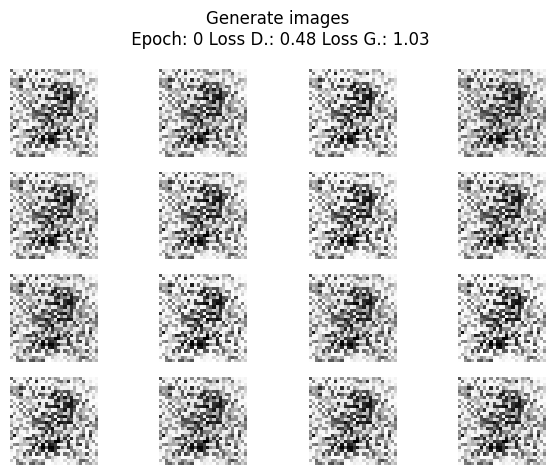

ValueError: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.

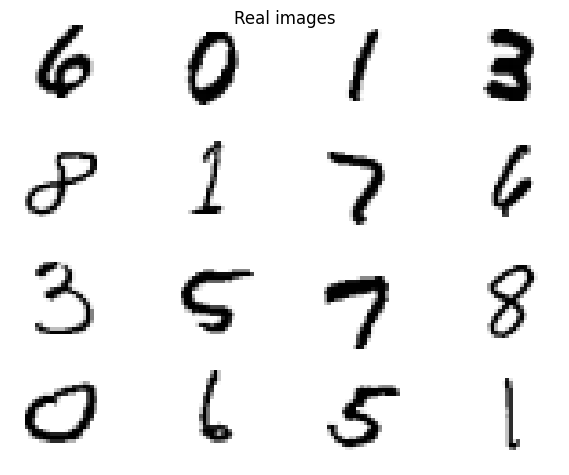

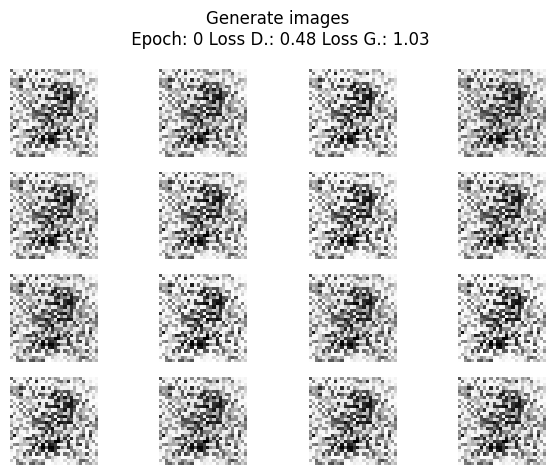

In [6]:
train_gan(batch_size=64, num_epochs=100)


<h2 id="answer-4"><strong>Answer to exercise 4</strong></h2>

The error message shows that there's some misalignment between the input and target size when executing the training process

```loss_discriminator = loss_function(output_discriminator, all_samples_labels) ``` .

We first add a breakpoint after the dataset is loaded, and an assertion to check when does the misalignment happen.

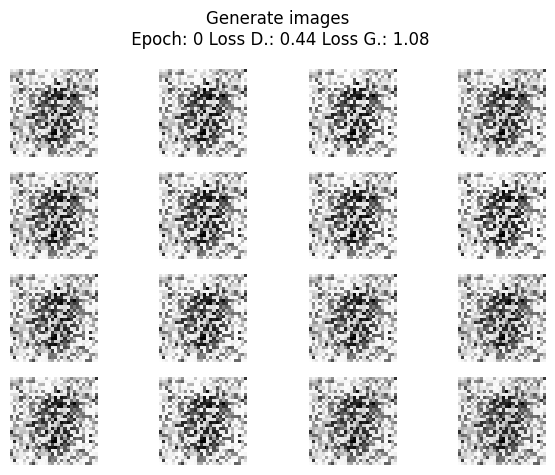

AssertionError: at 937th iteration, all_samples has size 96 while all_samples_labels has size 128.

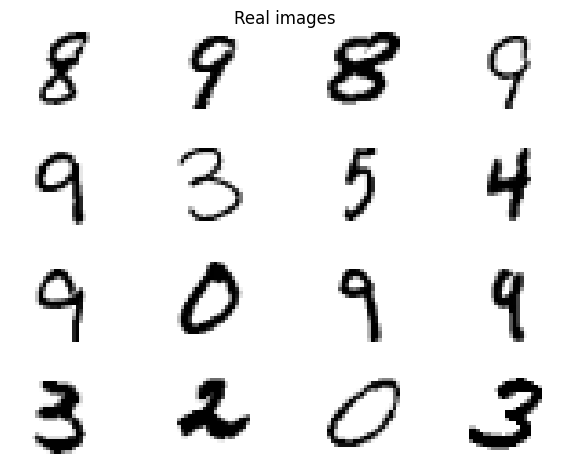

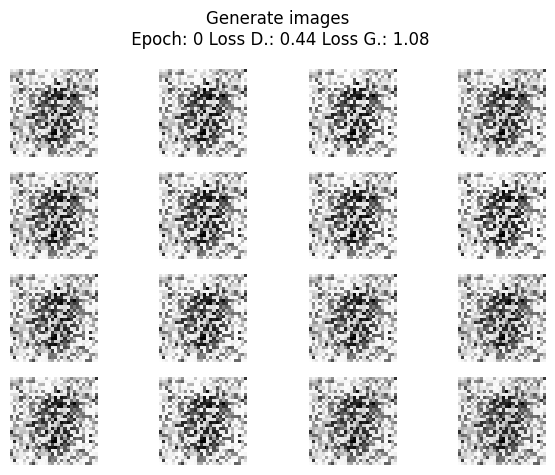

In [12]:
"""ADDING BREAKPOINTS"""
# You can copy this code to your personal pipeline project or execute it here.
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    ipdb.set_trace() #<----

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            assert len(all_samples)==len(all_samples_labels), f"at {n}th iteration, all_samples has size {len(all_samples)} while all_samples_labels has size {len(all_samples_labels)}."
            # ^^^^

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated
            if n == batch_size - 1:
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)

train_gan(batch_size=64, num_epochs=100)

As we can see, there are ```938``` batches when ```batch_size=64``` , and the misalignment happens at the **last** batch. The problem here is that the number of data in the dataset is a multiple of 32, but not 64.

There are multiple ways to deal with this situation. One is not to generate samples and labels with size ```batch_size```, but the real size of the current batch. We replace ```batch_size``` by ```len(real_samples)`` .

The code segment below does not trigger the bug.

As for the cosmetic bug, I think we usually want to see the result at the **end** of one epoch. The timing should be when ```n==len(train_loader)-1```, not ```batch_size-1```.

Note that the last batch may not contain enough (16) images to show. I didn't modify that part accordingly.

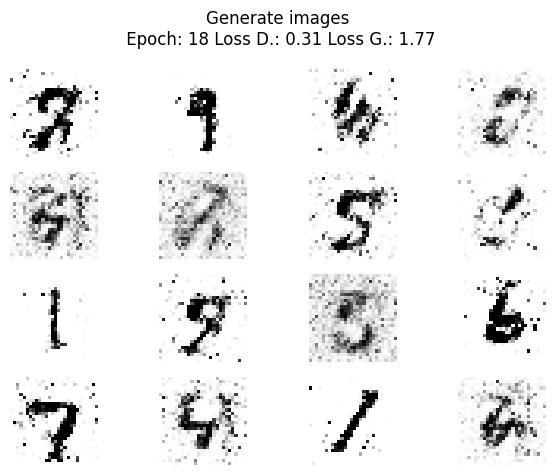

KeyboardInterrupt: 

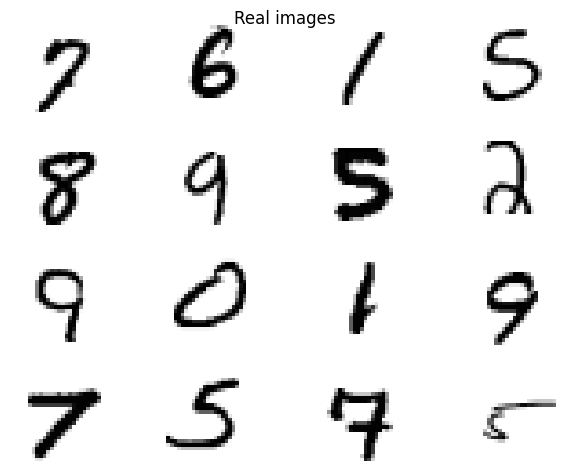

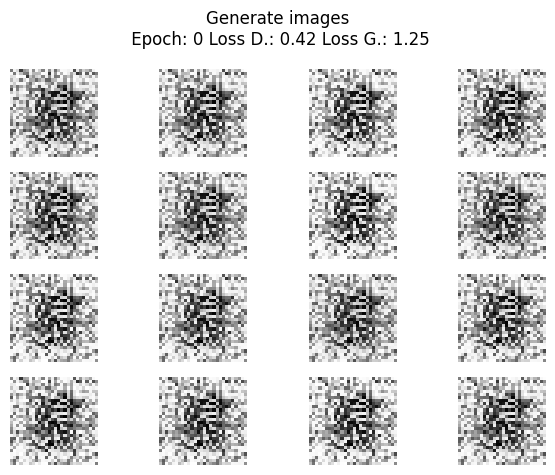

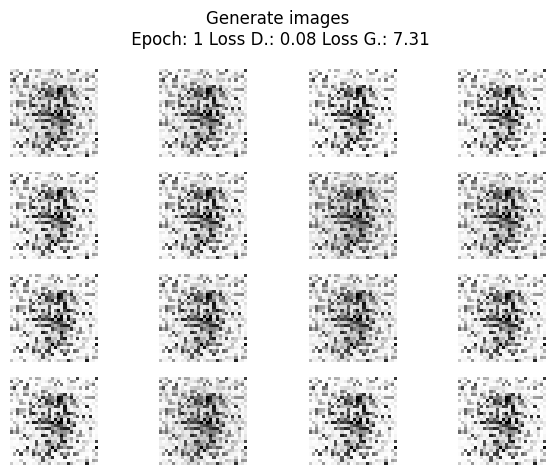

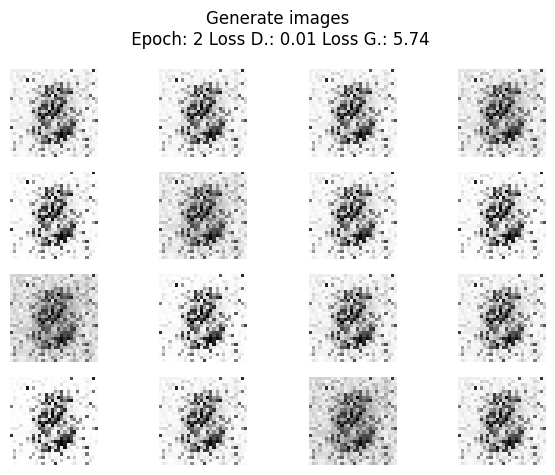

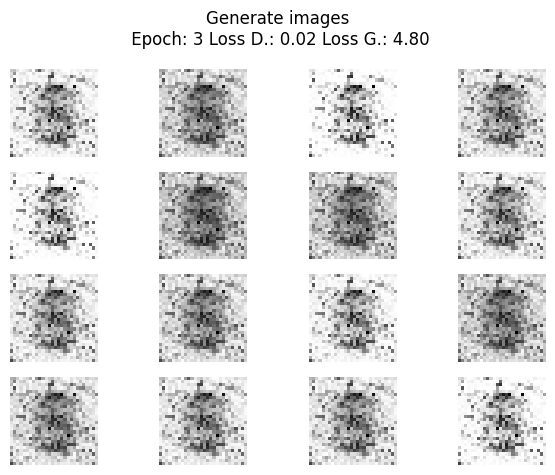

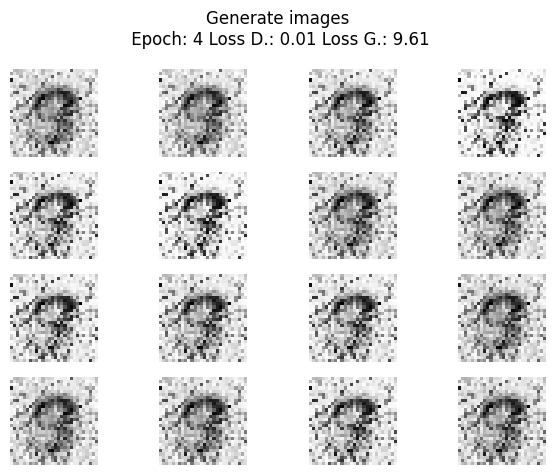

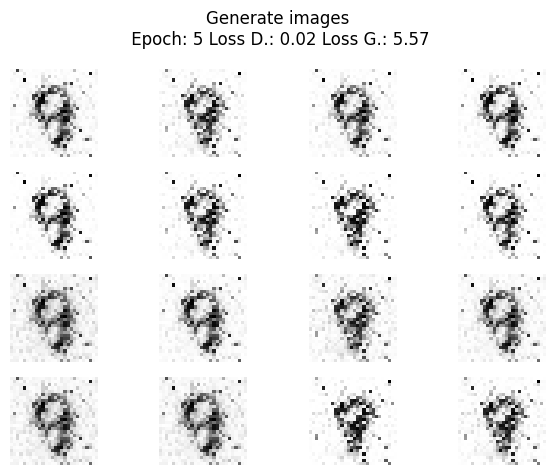

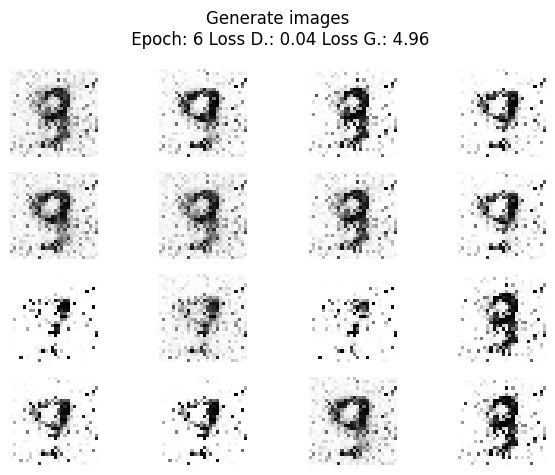

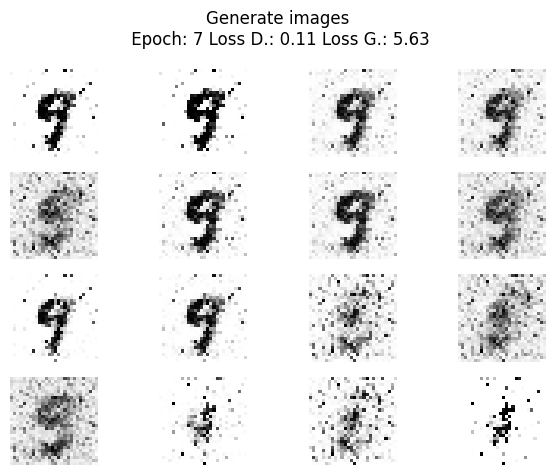

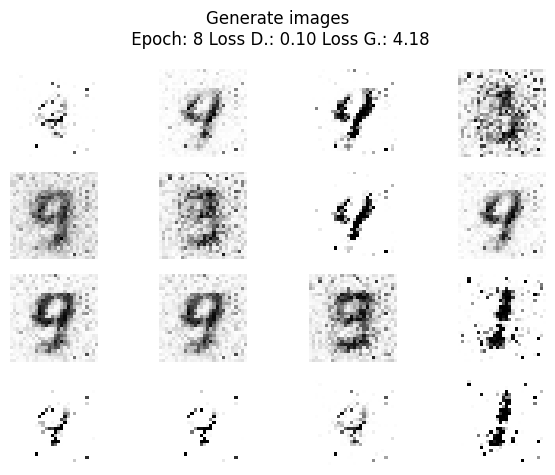

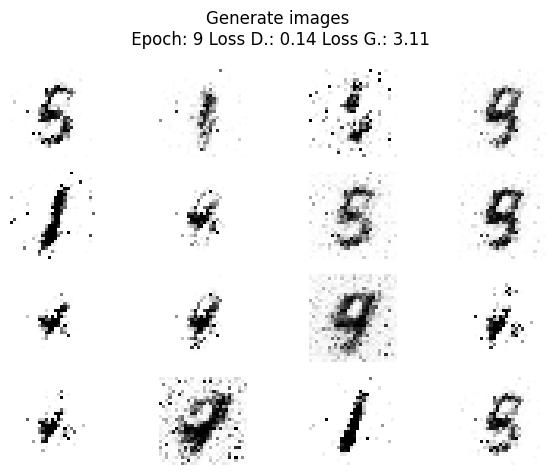

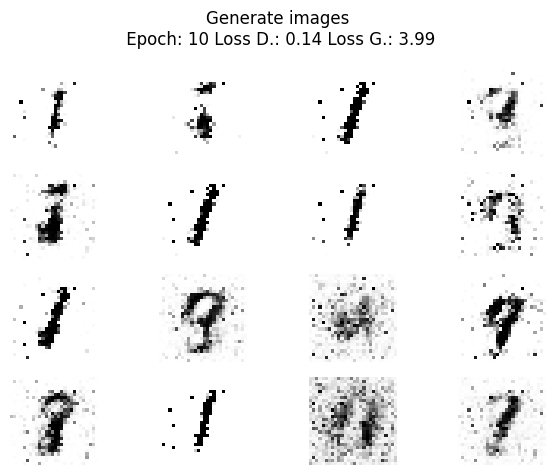

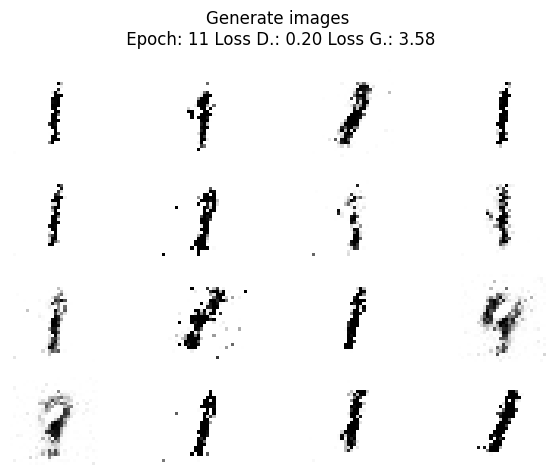

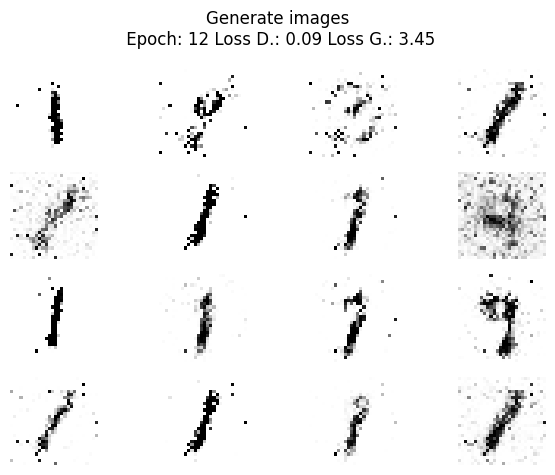

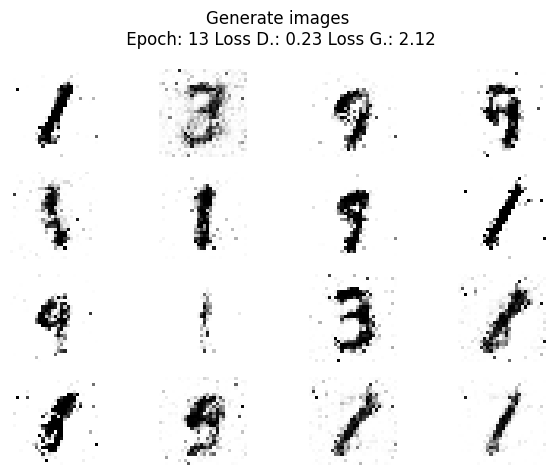

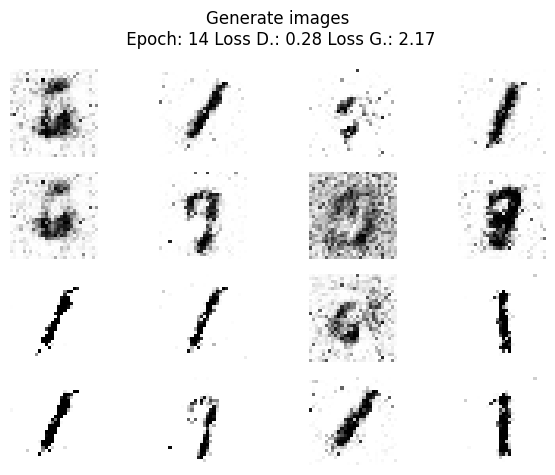

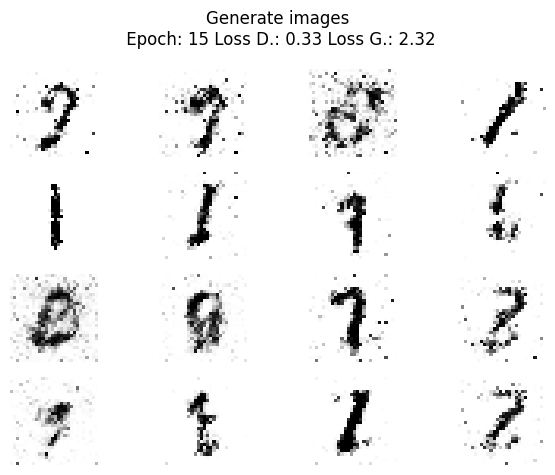

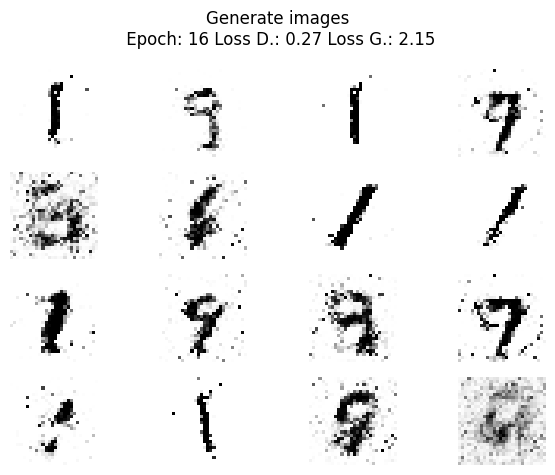

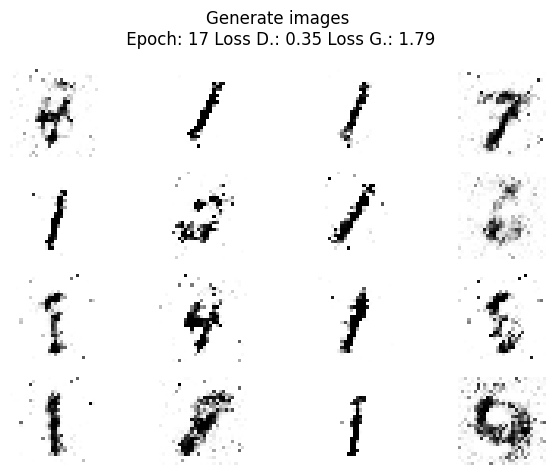

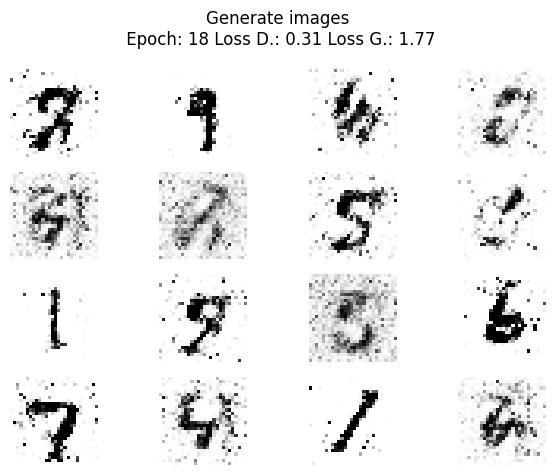

In [15]:
"""CORRECTION"""
# You can copy this code to your personal pipeline project or execute it here.
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            NUM_SAMPLES = len(real_samples) #<----

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((NUM_SAMPLES, 1)).to(device=device)
            latent_space_samples = torch.randn((NUM_SAMPLES, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((NUM_SAMPLES, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((NUM_SAMPLES, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated
            if n == len(train_loader) - 1: #<----
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)

train_gan(batch_size=64, num_epochs=100)